# Ejercicios libro Leraning from data


## Ejercicio 1.2 

Suponga que usamos un perceptron para detectar mensajes de spam. Podemos decir que cada correo es está representado por la frecuencia de ocurrencia de palabras clave, y la salida de el mensaje es $+1$ si el mensaje es considerado spam.

1.   ¿Puedes pensar algunas palabras que tendrán con un peso grande en el perceptron?

2.  ¿Que palabras tendrán un peso negativo?

3. ¿Que parámetro en el perceptron afectará directamente afecta cuantos mensajes frontera terminaran siendo clasificados como spam? 

Respuestas:

1.  Algunas keywords que pueden tener peso positivo elevado son: "sex", "free", "earn", "money", "cheap". 

2.  Algunas keywords que pueden tener peso negativo son: "homework", "hi", "goodbye", "hope", "tell", "work.

3.  El parametro $b$ del perceptron afecta de manera directa cuantos mensajes que se encuntren en la frontera son clasificados como spam.  


## Ejercicio 1.3

La regla de actualización de peso en (1.3) tiene una buena interpretación de lo que se mueve correctamente en dirección de clasificar $x(t)$:

1.   Muestre que $y(t)w^T(t)x(t) < 0$
2.   Muestre que $y(t)w^T(t+1)x(t) > y(t)w^T(t+1)x(t)$
3.   En lo que respecta a la clasificación de $x(t)$, argumenta que el movimiento desde $w(t)$ a $w(t+1 )$ es un movimiento ``en la dirección correcta''

Respuestas:

1.   Si $x(t)$ no se clasifica de manera correcta por $w(t)$, entonces $w(T)x(t)$ tiene signo diferente a $y(t)$, luego $y(t)w^T(t)x(t) < 0$
2.   veamos lo siguiente:

  Nota: $w(t+1)=w(t)+y(t)x(t)$

\begin{align*}
y(t)w^T(t+1)x(t) &= y(t)(w(t) + y(t)x(t))^Tx(t) \\
&= y(t)(w^T(t) + y(t)x^T(t))x(t) \\
&= y(t)w^T(t)x(t) + y(t)y(t)x^T(t)x(t) \\
&> y(t)w^T(t)x(t) \\
\end{align*}

3.  Tenemos que $y(t)w^T(t)x(t)$ aumenta cada incremento. 

  Por lo que si $y(t)$ es positivo y $w^T(t)x(t)$ es negativo, en $w^T(t)x(t)$ nos movemos en dirección positiva si lo incrementamos. 

  Por otro lado se $y(t)$ es negativo y $w^T(t)x(t)$ es positivo, el incremento de $y(t)w^T(t)x(t)$ implica que $w^T(t)x(t)$ es decreciente. 

  Así cuando nos movemos de $w(t)$
  a $w(t+1)$ nos movemos en la dirección correcta 

## Ejercicio 1.10

Este es un experimento que ilustra la diferencia entre un solo contenedor y múltiples contenedores. Realiza una simulación por computadora lanzando 1,000 monedas. Lanza cada moneda de forma independiente 10 veces. Enfoquémonos en 3 monedas de la siguiente manera: $c_{1}$ es la primera moneda lanzada; $c_{\text {rand }}$ es una moneda que eliges al azar; $c_{\min }$ es la moneda que tuvo la frecuencia mínima de caras (elige la más temprana en caso de empate). Sean $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$ las fracciones de caras obtenidas para las respectivas tres monedas.


1.   ¿Cuál es el valor esperado $\mu$ para las tres monedas seleccionadas?
2.   Repita este experimento completo un gran número de veces (por ejemplo, 100,000 ejecuciones del experimento completo) para obtener varias instancias de $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$, y traza los histogramas de las distribuciones de $\nu_{1}, \nu_{\text {rand }}$ y $\nu_{\min }$. Observe que las monedas que resulten ser $c_{\text {rand }}$ y $c_{\min }$ pueden variar de una ejecución a otra.

3.   Utilizando $2)$, traza las estimaciones para $\mathbb{P}[|\nu-\mu|>\epsilon]$ en función de $\epsilon$, junto con la cota de Hoeffding $2 e^{-2 \epsilon^{2} N}$

4. ¿Que monedas cumplen con la cota de Hoeffding y cuáles no?

5. Relaciona la parte $4)$ con los múltiples recipientes en la Figura 1.10.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def coinflips(x,flips,n):
  exp=np.zeros((flips,n))
  for i in range(flips):
    exp[i]=np.random.randint(low=0,high=2,size=n)
  all=np.mean(exp,axis=0) #Fracción de caras
  v_1=all[1]
  v_rand=np.random.choice(all)
  v_min=np.min(all)

  return v_1,v_rand,v_min

n=1000
flips=10
data =np.vectorize(coinflips)(np.zeros(100000),flips,n)

In [ ]:
print('Frequency of first coin: {}'.format(sum(data[0])/len(data[0])))
print('Frequency of a random coin: {}'.format(sum(data[1])/len(data[1])))
print('Frequency of the coin with minimum frequency: {}'.format(sum(data[2])/len(data[2])))

Frequency of first coin: 0.4990729999999999
Frequency of a random coin: 0.5002100000000047
Frequency of the coin with minimum frequency: 0.03759099999997677


Respuestas:
1.   El 𝜇 para las 3 monedas es de $0.5$, ya que ninguna moneda está trucada.  

2. En el siguiente código respodemos al punto 2:



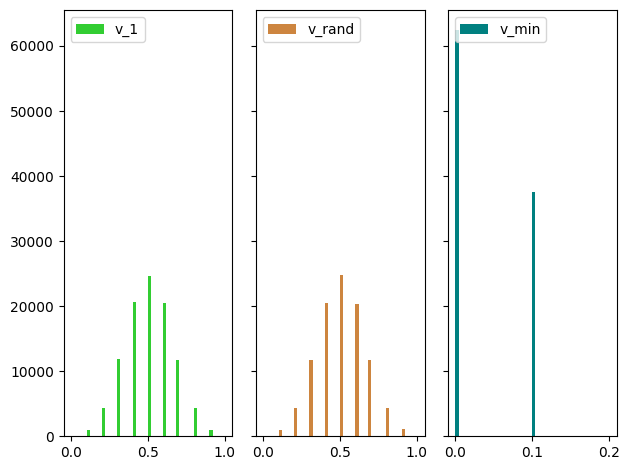

In [ ]:
# PUNTO 2

fig, axs = plt.subplots(1,3,sharey=True, tight_layout=True)
n_bins = 50
axs[0].hist(data[0],bins=n_bins,label='v_1', color='limegreen');
axs[0].legend(loc='upper left')
axs[1].hist(data[1],bins=n_bins,label='v_rand',color='peru');
axs[1].legend(loc='upper left')
axs[2].hist(data[2],bins=n_bins,label='v_min',color='teal');
axs[2].legend(loc='upper left')

3. En el siguiente código respondemos al punto 3

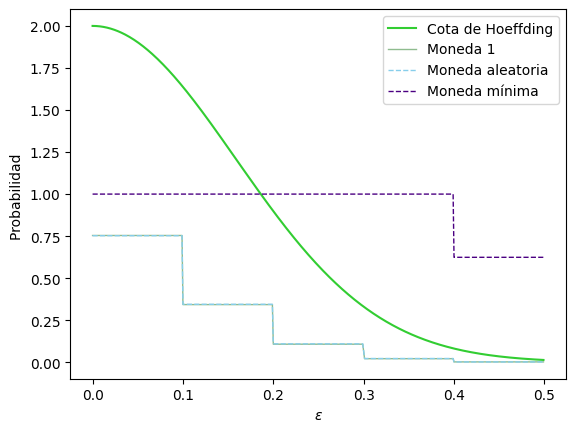

In [ ]:
# PUNTO 3

mu=0.5
dif= lambda x: np.abs(x-mu)
difs =np.vectorize(dif)(data)
eps=np.arange(0,0.5,0.001)
hoeff= 2.0*np.exp(-2.0*flips*(eps**2))
prob= lambda x,indx: np.sum(difs[indx]>x)/100000
p1=np.vectorize(prob)(eps,0)
prand=np.vectorize(prob)(eps,1)
pmin=np.vectorize(prob)(eps,2)
fig, ax = plt.subplots()
plt.plot(eps, hoeff, color='limegreen', label='Cota de Hoeffding')
plt.plot(eps, p1, color='darkseagreen', linewidth=1, label='Moneda 1')
plt.plot(eps, prand, color='skyblue', linewidth=1, linestyle='dashed', label='Moneda aleatoria')
plt.plot(eps, pmin, color='indigo', linewidth=1, linestyle='dashed', label='Moneda mínima')
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probabilidad ')
plt.legend()
plt.show()




4.   Note que la primera moneda y la moneda aleatoria obedecen la cota de Hoeffding, sin embargo la moneda con la menor frecuencia no lo hace. Lo anterior se debe a que tanto la primera moneda como la moneda aleatoria se eligen antes del experimento, mientras que la moneda con la menor frecuencia se elige una vez realizado el experimento y analizando los resultados, esto viola la condición para la cota de Hoeffding que dice que la hipotesis debe estár determinada antes de tomar las muestras.
5.   Cuando elegimos la moneda que tiene la frecuencia mínima de caras, estamos como eligiendo un bin de 1000 bins (nuestro espacio de hipótesis). Pero elegimos el bin después de haber terminado de tomar las muestras de los datos. Esto es similar a un algoritmo de aprendizaje para la hipótesis final. Las otras dos monedas se eligieron antes de la toma de muestras, lo que es elegir el bin de antemano.



## Ejercicio 1.11

Se nos proporciona un conjunto de datos $\mathcal{D}$ con 25 ejemplos de entrenamiento de una función objetivo desconocida $f: \mathcal{X} \rightarrow \mathcal{Y}$, donde $\mathcal{X}=\mathbb{R}$ y $\mathcal{Y}=\{-1,+1\}$. Para aprender $f$, utilizamos un conjunto de hipótesis simple $\mathcal{H}=\left\{h_{1}, h_{2}\right\}$ donde $h_{1}$ es la función constante +1 y $h_{2}$ es la función constante -1.

Consideramos dos algoritmos de aprendizaje, S (inteligente) y C (loco). S elige la hipótesis que concuerda más con $\mathcal{D}$ y C elige deliberadamente la otra hipótesis. Veamos cómo se desempeñan estos algoritmos fuera de la muestra desde los puntos de vista determinista y probabilístico. Supongamos, en el punto de vista probabilístico, que hay una distribución de probabilidad en $\mathcal{X}$, y sea $\mathbb{P}[f(\mathbf{x})=+1]=p$.



1.   ¿Puede S producir una hipótesis que garantice un mejor rendimiento que el azar en cualquier punto fuera de $\mathcal{D}$?
2.   Supongamos, para el resto del ejercicio, que todos los ejemplos en $\mathcal{D}$ tienen $y_{n}=+1$. ¿Es posible que la hipótesis que produce C resulte ser mejor que la hipótesis que produce S?
3.   Si $p=0.9$, ¿cuál es la probabilidad de que S produzca una hipótesis mejor que C?
4.   ¿Existe algún valor de $p$ para el cual sea más probable que no que C produzca una hipótesis mejor que S?


Respuestas:


1.   No es posible que $S$ produzca una hipotesis que tenga garantizado que va a funcionar mejor en cualquier punto aleatorio fuera de $D$

2.   Puede pasar que $C$ produzca una mejor hipotesis que $S$

3.  Supongamos que cada punto en $D$
 tiene un valor de $+1$, entonces $S$ va a escoger $h_1$ y $C$ va a escoger a $h_2$. Entonces fuera de $D$, $h_1$ va a tener un $90%$ to acertar los valores de $f$ y $h_2$ va a tener solo el 10%.En este caso $S$ siempre va a producir una mejor hipotesis que $C$. 

4. Note que del punto anterior podemos ver que cuando $p < 0.5$, $C$ produce mejores hipotesis que $S$. Pues como $C$ simpre produce $h_2$ que se ajusta mejor a $f$ que $h_1$ si $p < 0.5$.


## Ejercicio 1.12

Una amiga se acerca a ti con un problema de aprendizaje. Dice que la función objetivo $f$ es completamente desconocida, pero tiene 4,000 puntos de datos. Está dispuesta a pagarte para resolver su problema y producirle un $g$ que aproxime a $f$. ¿Qué es lo mejor que puedes prometerle de las siguientes opciones?

1.   Después de aprender, le proporcionarás un $g$ que garantizará una buena aproximación de $f$ fuera de la muestra.
2.  Después de aprender, le proporcionarás un $g$, y con alta probabilidad el $g$ que produzcas aproximará bien a $f$ fuera de la muestra.
3. Ocurrirá una de las dos cosas.
  1.   Producirá una hipótesis $g$;
  2.   Declarará que fracasaste.

  Si devuelves una hipótesis $g$, entonces con alta probabilidad el $g$ que produzcas aproximará bien a $f$ fuera de la muestra.


Respuesta:

Lo mejor que se puede prometer es la opción 3 por lo siguiente: 


*   Si $f$ es demasiado compleja, entonces va a ser imposible aprender con la información dada y vamos a fallar.
*   Si por el contrario logramos aprender y producir la hipotesis $g$, como tenemos al rededor de 4000 puntos, la probabilidad de que $g$ coincida con $f$ es alta debido a la desigualdad de Hoeffding, y el error debe ser pequeño por el tamaño del data set. 

